In [2]:
%load_ext autoreload
%autoreload 2

from HSM_model_copy import HouseholdSpecializationModelClass
import numpy as np
import pandas as pd
from tqdm import tqdm
%matplotlib inline
%matplotlib qt
from matplotlib import pyplot as plt
from scipy import optimize



**Question 1**

In [3]:
model = HouseholdSpecializationModelClass()

print(model.par)

namespace(rho=2.0, nu=0.001, epsilon=1.0, omega=0.5, alpha=0.5, sigma=1.0, wM=1.0, wF=1.0, wF_vec=array([0.8, 0.9, 1. , 1.1, 1.2]), beta0_target=0.4, beta1_target=-0.1)


In [4]:
q1_sol = {}
for i in ['HF', 'HM', 'alpha', 'sigma']:
    q1_sol[i] = []

for model.par.alpha in [0.25, 0.50, 0.75]:
    for model.par.sigma in [0.5, 1.0, 1.5]:
        opt = model.solve_discrete()
        q1_sol['HF'].append(opt.HF)
        q1_sol['HM'].append(opt.HM)
        q1_sol['alpha'].append(model.par.alpha)
        q1_sol['sigma'].append(model.par.sigma)

model.par.alpha = 0.5
model.par.sigma =1


/Users/carlsimpson/Documents/6. semester polit/Intro Prog/projects-2023-scb/inauguralproject/HSM_model_copy.py:76: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**potens + par.alpha * HF**potens)**potens**-1


In [5]:
q1_sol = pd.DataFrame(q1_sol)
q1_sol['HF/HM'] = q1_sol['HF']/q1_sol['HM']
q1_sol

,HF,HM,alpha,sigma,HF/HM
0,3.0,5.5,0.25,0.5,0.545455
1,2.0,6.5,0.25,1.0,0.307692
2,1.5,7.0,0.25,1.5,0.214286
3,4.5,4.5,0.50,0.5,1.000000
4,4.5,4.5,0.50,1.0,1.000000
5,4.5,4.5,0.50,1.5,1.000000
6,5.5,3.0,0.75,0.5,1.833333
7,6.5,2.0,0.75,1.0,3.250000
8,7.0,1.5,0.75,1.5,4.666667


**Plot Q1 solutions**

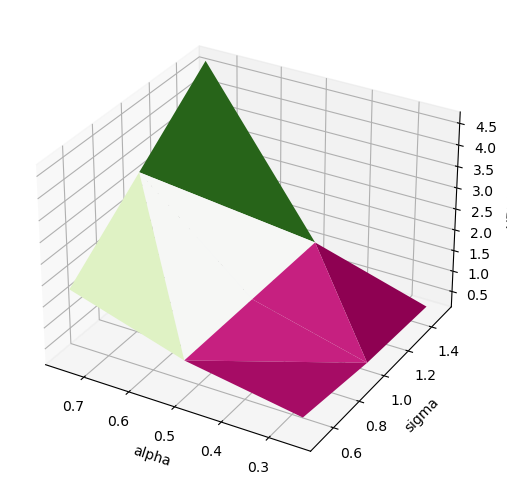

In [7]:
%matplotlib inline
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
x = q1_sol['alpha']
y = q1_sol['sigma']
hf_hm = q1_sol['HF/HM']
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('HF/HM')
ax.invert_xaxis()
ax.plot_trisurf(x,y, hf_hm, cmap='PiYG'); # create surface plot in the axis
# note: fig.add_subplot(a,b,c) creates the c'th subplot in a grid of a times b plots

**Question 2**


In [9]:

model = HouseholdSpecializationModelClass()

discrete_solution = model.solve_wF_vec(discrete=True)
df_discrete = {}
df_discrete['HF'] = discrete_solution.HF_vec
df_discrete['HM'] = discrete_solution.HM_vec
df_discrete['LF'] = discrete_solution.LF_vec
df_discrete['LM'] = discrete_solution.LM_vec


df_discrete = pd.DataFrame(df_discrete)
df_discrete['utility'] = model.calc_utility(df_discrete.LM, df_discrete.HM, df_discrete.LF, df_discrete.HF)
df_discrete['logHF/logHM'] = np.log(df_discrete['HF']) - np.log(df_discrete['HM'])
df_discrete['WF'] =  model.par.wF_vec.tolist()
df_discrete['WM'] = model.par.wM
df_discrete['logWF/logWM'] = np.log(df_discrete['WF']) - np.log(df_discrete['WM'])

df_discrete


,HF,HM,LF,LM,utility,logHF/logHM,WF,WM,logWF/logWM
0,5.0,4.0,3.0,6.0,-0.234618,0.223144,0.8,1.0,-0.223144
1,4.5,4.5,4.0,5.0,-0.231835,0.000000,0.9,1.0,-0.105361
2,4.5,4.5,4.5,4.5,-0.230822,0.000000,1.0,1.0,0.000000
3,4.0,4.5,5.0,4.0,-0.230151,-0.117783,1.1,1.0,0.095310
4,4.0,5.0,5.5,3.0,-0.229743,-0.223144,1.2,1.0,0.182322


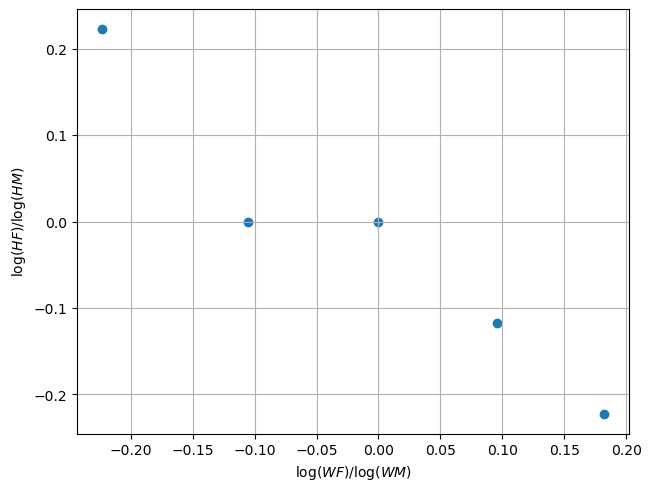

In [10]:
x = df_discrete['logWF/logWM']
y = df_discrete['logHF/logHM']

fig = plt.figure(constrained_layout=True)

ax = fig.add_subplot(1,1,1)
ax.grid()
ax.set_ylabel('$\log (HF)/\log (HM)$')
ax.set_xlabel('$\log (WF)/\log (WM)$')
ax.scatter(x, y)

In [276]:
print(model.par.alpha, model.par.sigma)

0.5 1


**Question 3**

**3.1 solving the consumer problem using a loop**

In [11]:
model = HouseholdSpecializationModelClass()

solutions = {}
for i in ['HF', 'HM', 'LF', 'LM', 'WF', 'WM', 'Utility']:
    solutions[i] = []

model.par.alpha = 0.5
model.par.sigma = 1

for i in [0.8, 0.9, 1.0, 1.1, 1.2]:
    model.par.wF = i
    solution = model.solve()
    solutions['HF'].append(solution.HF)
    solutions['LF'].append(solution.LF)
    solutions['HM'].append(solution.HM)
    solutions['LM'].append(solution.LM)
    solutions['WF'].append(model.par.wF)
    solutions['WM'].append(model.par.wM)
    solutions['Utility'].append(solution.U)
    
#
df = pd.DataFrame(solutions)


In [13]:
df['logHF/logHM'] = np.log(df['HF']) - np.log(df['HM'])

df['logWF/logWM'] = np.log(df['WF']) - np.log(df['WM'])

df['alternative_utility'] = model.calc_utility(df.LM, df.HM, df.LF, df.HF)

df

,HF,HM,LF,LM,WF,WM,Utility,logHF/logHM,logWF/logWM,alternative_utility
0,5.048236,4.044081,2.935603,5.916363,0.8,1.0,-0.245117,2.217846e-01,-0.223144,-0.234601
1,4.495728,4.495283,4.464100,4.526876,0.9,1.0,-0.242188,9.913449e-05,-0.105361,-0.230859
2,4.458666,4.458666,4.458666,4.458666,1.0,1.0,-0.238110,2.220446e-16,0.000000,-0.230730
3,4.422401,4.422790,4.449878,4.395285,1.1,1.0,-0.234247,-8.790622e-05,0.095310,-0.230640
4,3.993176,4.803493,5.508059,3.128289,1.2,1.0,-0.229719,-1.847565e-01,0.182322,-0.229719


***Solving the problem using the function with the defined wf_VEC***

In [12]:
### solve model using WF_vec gives us the same result as running the loop above 
contionoussolution = model.solve_wF_vec(discrete=False)
df1 = {}
df1['HF'] = contionoussolution.HF_vec
df1['HM'] = contionoussolution.HM_vec
df1['LF'] = contionoussolution.LF_vec
df1['LM'] = contionoussolution.LM_vec

df1 = pd.DataFrame(df1)
df1['utility'] = model.calc_utility(df1.LM, df1.HM, df1.LF, df1.HF)

df1

,HF,HM,LF,LM,utility
0,5.048236,4.044081,2.935603,5.916363,-0.234601
1,4.495728,4.495283,4.464100,4.526876,-0.230859
2,4.458666,4.458666,4.458666,4.458666,-0.230730
3,4.422401,4.422790,4.449878,4.395285,-0.230640
4,3.993176,4.803493,5.508059,3.128289,-0.229719


[]

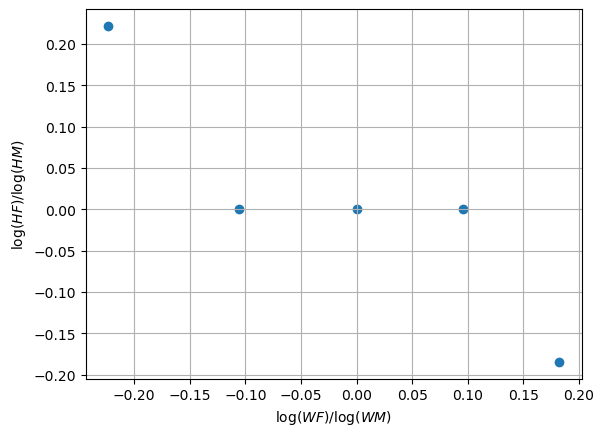

In [280]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['logWF/logWM'], df['logHF/logHM'])
ax.grid()
ax.set_ylabel('$\log (HF)/\log (HM)$')
ax.set_xlabel('$\log (WF)/\log (WM)$')
ax.plot()

In [281]:
print(model)


 The baseline parameters in the model is: 
1. Preferences           = (rho, epsilon, omega, nu) = (2.00, 1.00, 0.50, 0.001) 
2. Household production  = (alpha, sigma )           = (0.50, 1.00) 
3. Wages                 = (wM,wF)                   = (1.00, 1.20) 



In [282]:
print(model.solve())

namespace(LM=3.128289376256408, HM=4.803493234536152, LF=5.508058895603844, HF=3.9931761993762485, U=-0.2297186708068249)


**Run regression**

$\log \frac{H_F}{H_M} = \beta_0 + \beta_1 \log \frac{w_F}{w_M} $

In [283]:
model = HouseholdSpecializationModelClass()
model.solve_wF_vec()

print(model)
model.run_regression()

print(f'beta0 = {model.sol.beta0:.3} and beta_1 = {model.sol.beta1:.3}')


 The baseline parameters in the model is: 
1. Preferences           = (rho, epsilon, omega, nu) = (2.00, 1.00, 0.50, 0.001) 
2. Household production  = (alpha, sigma )           = (0.50, 1.00) 
3. Wages                 = (wM,wF)                   = (1.00, 1.20) 

beta0 = -0.000797 and beta_1 = -0.806


**Estimate $\sigma$ and $\alpha$ such that $(\beta_{0}-\hat \beta_0)^2+(\beta_1-\hat \beta_1)^2$ is minimized, where we assume that $\beta_0=0.4$ and $\beta_1 \approx -0.1$**



In [284]:

beta0 = 0.4
beta1 = -0.1
def lossfunction(beta0hat, beta1hat, beta0=0.4, beta1=-0.1):
    return (beta0-beta0hat)**2 + (beta1-beta1hat)**2 

winners = {}
winners['alpha'] = []
winners['sigma'] = []
winners['loss'] = []

all = {}
all['alpha'] = []
all['sigma'] = []
all['loss'] = []

for model.par.alpha in tqdm(np.linspace(0,1, 50)):
    for model.par.sigma in np.linspace(0, 3, 50):
            sol = model.solve_wF_vec()
            model.run_regression()
            beta0hat = model.sol.beta0
            beta1hat = model.sol.beta1
            #print(f'beta0 = {model.sol.beta0:.3} and beta_1 = {model.sol.beta1:.3}')
            loss = lossfunction(beta0hat, beta1hat)
            all['alpha'].append(model.par.alpha)
            all['sigma'].append(model.par.sigma)
            all['loss'].append(loss) 
            if -0.4 <= loss <= 0.4:
                 winners['alpha'].append(model.par.alpha)
                 winners['sigma'].append(model.par.sigma)
                 winners['loss'].append(loss)

model.par.alpha = 0.5
model.par.sigma = 1



  0%|          | 0/50 [00:00<?, ?it/s]/Users/carlsimpson/Documents/6. semester polit/Intro Prog/projects-2023-scb/inauguralproject/HSM_model_copy.py:76: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**potens + par.alpha * HF**potens)**potens**-1
/Users/carlsimpson/Documents/6. semester polit/Intro Prog/projects-2023-scb/inauguralproject/HSM_model_copy.py:76: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**potens + par.alpha * HF**potens)**potens**-1
/Users/carlsimpson/Documents/6. semester polit/Intro Prog/projects-2023-scb/inauguralproject/HSM_model_copy.py:231: RuntimeWarning: divide by zero encountered in log
  y = np.log(sol.HF_vec/sol.HM_vec)
  2%|▏         | 1/50 [00:26<21:16, 26.05s/it]


KeyboardInterrupt: 

In [156]:
winner_df = pd.DataFrame(winners)
winner_df.sort_values(by='loss')


,alpha,sigma,loss
11,0.666667,0.333333,0.065146
13,0.777778,0.333333,0.073081
8,0.555556,0.333333,0.154398
14,0.888889,0.000000,0.170005
12,0.777778,0.000000,0.170005
10,0.666667,0.000000,0.170005
7,0.555556,0.000000,0.170005
0,0.000000,0.000000,0.170005
4,0.444444,0.000000,0.170005
3,0.333333,0.000000,0.170005


In [181]:
all = pd.DataFrame(all)

In [182]:
all

,alpha,sigma,loss
0,0.0,0.000000,0.170005
1,0.0,0.061224,1467.152848
2,0.0,0.122449,1407.827167
3,0.0,0.183673,1423.526260
4,0.0,0.244898,1374.884773
...,...,...,...
2495,1.0,2.755102,NaN
2496,1.0,2.816327,NaN
2497,1.0,2.877551,NaN
2498,1.0,2.938776,NaN


In [183]:
#all_no_nan = all.loc[(all['loss'].isnull()==False)&(all['sigma']<1)&(all['alpha']<1)&(all['loss']<100), :]
all_no_nan = all.loc[all['loss']<100, :]

In [214]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
x = all['alpha']
y = all['sigma']
z = all['loss']
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('loss')
ax.invert_xaxis()
ax.plot_trisurf(x,y, z, cmap='PiYG'); # create surface plot in the axis
# note: fig.add_subplot(a,b,c) creates the c'th subplot in a grid of a times b pl

In [215]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
x = all_no_nan['alpha']
y = all_no_nan['sigma']
z = all_no_nan['loss']
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('loss')
ax.invert_xaxis()
ax.plot_trisurf(x,y, z, cmap='Blues'); # create surface plot in the axis
# note: fig.add_subplot(a,b,c) creates the c'th subplot in a grid of a times b pl

In [217]:
df = all.loc[all['loss']<0.3]
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
x = df['alpha']
y = df['sigma']
z = df['loss']
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('loss')
ax.invert_xaxis()
ax.plot_trisurf(x,y, z, cmap='PiYG'); # create surface plot in the axis
# note: fig.add_subplot(a,b,c) creates the c'th subplot in a grid of a times b pl

**Estimate like Jeppe Did in the ASAD lecture**

In [189]:


def obj(x, parnames, do_print=False):
      # a. update parameters
    for xval,parname in zip(x,parnames):
        par.__dict__[parname] = xval
        if do_print: print(f'{parname:10s} = {xval:.4f}')

    if do_print: print('')

    # b. simulate and calculate moments
    model.solve_wF_vec()
    model.run_regression()

    # c. compare with data
    error = model.loss_function()

    return error



**Calculate objective at initial values:**

In [198]:
par = model.par
model.par.alpha = 0.5
model.par.sigma = 0.8
parnames = ['alpha','sigma']

#x0 = [par.__dict__[parname] for parname in parnames]
x0 = [0.5, 0.7]
error_ = obj(x0,parnames,do_print=True)
print(error_)

alpha      = 0.5000
sigma      = 0.7000

0.3814121057393089


In [199]:
bounds = ((0,1),(0,100))
res = optimize.minimize(obj,x0,bounds=bounds,method='nelder-mead',args=(parnames))

In [196]:
assert res.success

In [200]:
error_ = obj(res.x, parnames, do_print=True)
print(error_)

alpha      = 0.9881
sigma      = 0.0911

5.998033018136862e-08


**Estimate with module in "HSM_model_copy.py"**

In [268]:
print(model.par.alpha, model.par.sigma)


0.007031250000000003 0.0


In [292]:
model.par.alpha = 0.99
model.par.sigma = 0.1
error = model.estimate()

alpha      = 0.9882
sigma      = 0.0910



In [293]:
print(error)

8.825950489998941e-09
